<a href="https://colab.research.google.com/github/lewisfogden/heavymodel/blob/core-updates/example_models/HeavyModel_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heavymodel Example

This notebook contains a working example of using heavymodel.  See https://digitalactuary.co.uk for details of heavymodel.

### 1: Install `heavymodel` from PyPI

In [1]:
%pip install heavymodel-lewisfogden

### 2: Import the `Model` class from `heavymodel`

In [0]:
from heavymodel import Model

### 3: Define the user model as a subclass of Model

In [0]:
class DemographicModel(Model):
  def num_pols(self, t):
    if t == 0:
      return 1
    else:
      return self.num_pols(t-1) - self.num_lapses(t-1) - self.num_claims(t-1)
  
  def num_lapses(self, t):
    return self.lapse_rate * self.num_pols(t)
  
  def num_claims(self, t):
    return self.claim_rate * self.num_pols(t)

### 4: Create an instance of the model and run it

In [0]:
proj = DemographicModel({"lapse_rate":0.04, "claim_rate":0.07})

In [0]:
proj._run(50)

### 5: Export results to a dataframe, review and plot.

In [24]:
results = proj._dataframe()
results.tail()

,num_claims,num_lapses,num_pols
45,0.000370,0.000211,0.005279
46,0.000329,0.000188,0.004698
47,0.000293,0.000167,0.004181
48,0.000261,0.000149,0.003722
49,0.000232,0.000132,0.003312


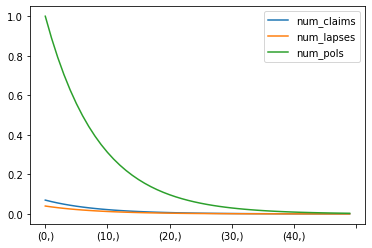

In [25]:
results.plot();

### 6: Create a subclass using the existing model

In [0]:
class LifeAssurance(DemographicModel):
  def premiums(self, t):
    if t >= 0:
      return self.annual_premium * self.num_pols(t)
    else:
      return 0
  
  def claims(self, t):
    if t >= 0:
      return self.sum_assured * self.num_claims(t)

### 7: Create an instance & project it

Here we have specified the assumption basis separately from the data.

In [0]:
basis = {"lapse_rate":0.04, "claim_rate":0.07}
data = {"annual_premium":5000, "sum_assured":100_000}
life_pol = LifeAssurance(basis, data)

In [0]:
life_pol._run(100)

### 8: Convert to pandas dataframe and plot

In [49]:
results = life_pol._dataframe()
results.head()

,claims,num_claims,num_lapses,num_pols,premiums
0,7000.00000,0.070000,0.040000,1.000000,5000.00000
1,6230.00000,0.062300,0.035600,0.890000,4450.00000
2,5544.70000,0.055447,0.031684,0.792100,3960.50000
3,4934.78300,0.049348,0.028199,0.704969,3524.84500
4,4391.95687,0.043920,0.025097,0.627422,3137.11205


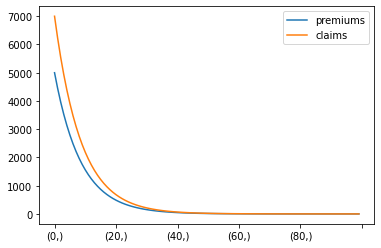

In [50]:
ax = results.plot(y="premiums")
results.plot(y="claims", ax=ax);